# User Engagement analysis

# Libraries

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../')) 
sys.path.append(module_path)

In [2]:
import pandas as pd
# import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

from src.EDA import fix_na_outlier, top_users_per_metrics, plot_top_users_per_metrics, normalizer,\
kmeans, calculate_group_stats, plot_group_stats

import warnings
warnings.filterwarnings('ignore')

## Import data

In [3]:
users_data=pd.read_csv("../data/users_agg_data.csv")
del users_data["Unnamed: 0"]

## rename Bearer Id to session frequency

In [4]:
users_data=users_data.rename(columns={"Bearer Id":"Session Frequency"})

# replace  outliers by mean

In [5]:
users_data.iloc[:,1:]=fix_na_outlier(users_data.iloc[:,1:])

In [6]:
users_data.head()

,MSISDN/Number,Session Frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social_media_data,Google_data,Email_data,Youtube_data,Netflix_data,Gaming_data,Others_data,total data (Bytes)
0,3.360100e+10,1.0,116720.0,4.546640e+08,36053108.0,2232135.0,4389005.0,1.331362e+06,21624548.0,27180981.0,4.234318e+08,386570872.0,3.456294e+08
1,3.360100e+10,1.0,181230.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3.307781e+06,12432223.0,11221763.0,1.197501e+08,281710071.0,7.071854e+08
2,3.360100e+10,1.0,134969.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3.205380e+06,21333570.0,19353900.0,5.388277e+08,501693672.0,3.076910e+08
3,3.360101e+10,1.0,49878.0,4.019932e+08,20327526.0,280294.0,9678493.0,2.284670e+06,6977321.0,1942092.0,3.911261e+08,35279702.0,4.957771e+08
4,3.360101e+10,2.0,37104.0,1.363130e+09,94280527.0,2912542.0,18499616.0,2.860947e+06,41533002.0,49201724.0,1.314798e+09,804804484.0,6.076814e+08


##  the top 10 customers per engagement metric 


### sessions frequency 

In [7]:
top_users_per_metrics(users_data, 'MSISDN/Number', 'Session Frequency', 10)

,MSISDN/Number,Session Frequency
29,3.360105e+10,3.0
57,3.360110e+10,3.0
88,3.360118e+10,3.0
116,3.360123e+10,3.0
121,3.360125e+10,3.0
178,3.360135e+10,3.0
195,3.360138e+10,3.0
197,3.360139e+10,3.0
208,3.360143e+10,3.0
240,3.360149e+10,3.0


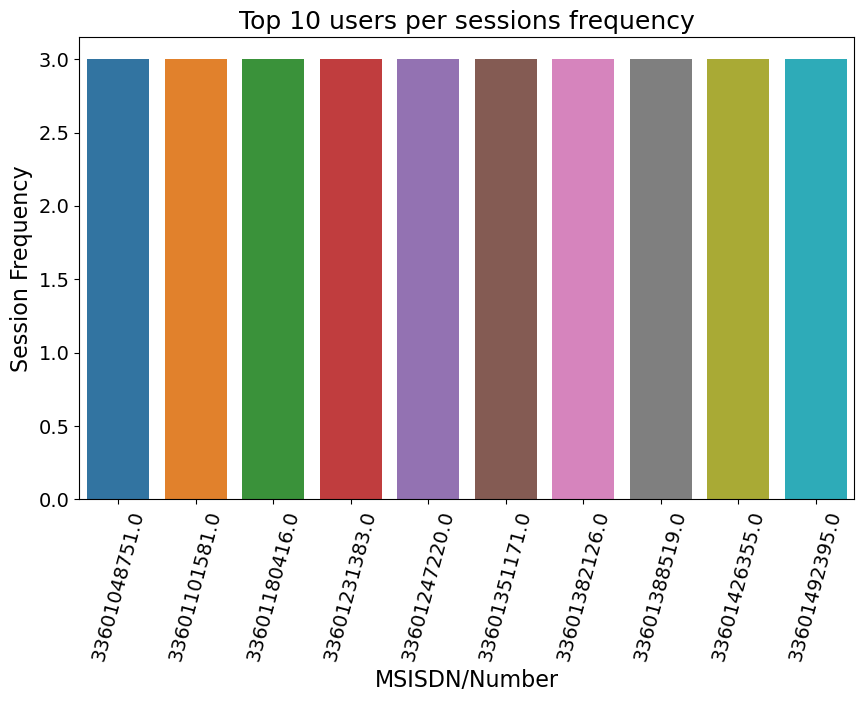

In [8]:
plot_top_users_per_metrics(users_data, 'MSISDN/Number', 'Session Frequency',"Top 10 users per sessions frequency", 10)

### the duration of the session 

In [9]:
top_users_per_metrics(users_data, 'MSISDN/Number', 'Dur. (ms)', 10)

,MSISDN/Number,Dur. (ms)
100963,3.376813e+10,329224.000000
31867,3.365865e+10,329219.000000
63808,3.366680e+10,329208.000000
44257,3.366149e+10,329184.000000
56965,3.366470e+10,329184.000000
72894,3.366995e+10,329183.000000
71658,3.366938e+10,329165.054974
16426,3.363185e+10,329133.000000
13498,3.362637e+10,329126.000000
41729,3.366086e+10,329111.000000


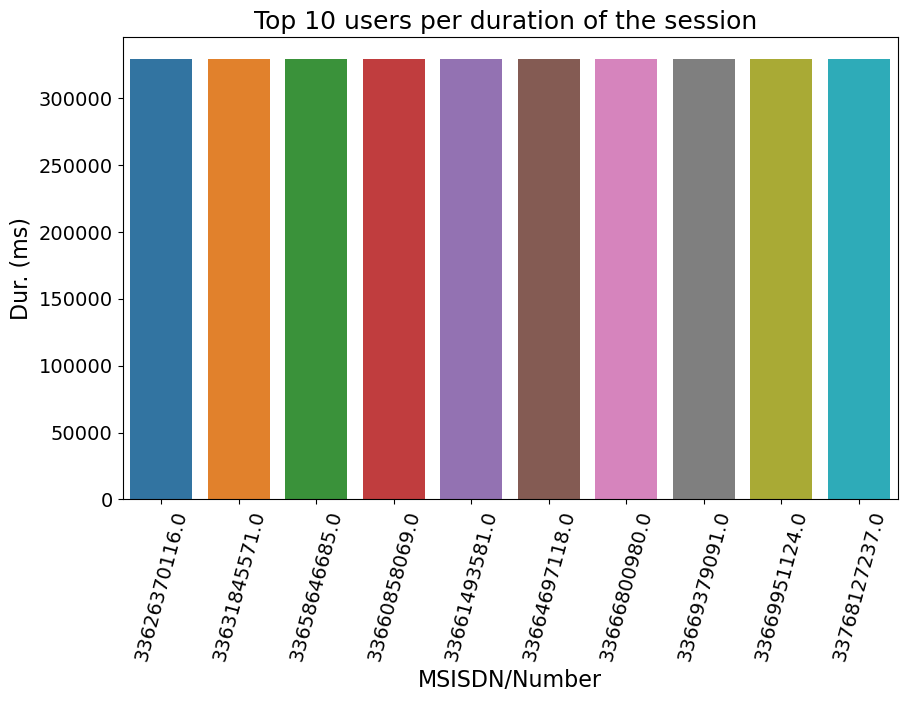

In [10]:
plot_top_users_per_metrics(users_data, 'MSISDN/Number', 'Dur. (ms)',"Top 10 users per duration of the session ", 10)

### the sessions total traffic (download and upload (bytes))

In [11]:
top_users_per_metrics(users_data, 'MSISDN/Number',  'total data (Bytes)', 10)

,MSISDN/Number,total data (Bytes)
48186,3.366240e+10,875314847.0
91212,3.375856e+10,875313739.0
82301,3.368840e+10,875309321.0
13227,3.362594e+10,875308460.0
58915,3.366521e+10,875298981.0
79813,3.368337e+10,875298639.0
77394,3.367853e+10,875281967.0
68782,3.366843e+10,875274749.0
40479,3.366057e+10,875259057.0
42365,3.366102e+10,875247855.0


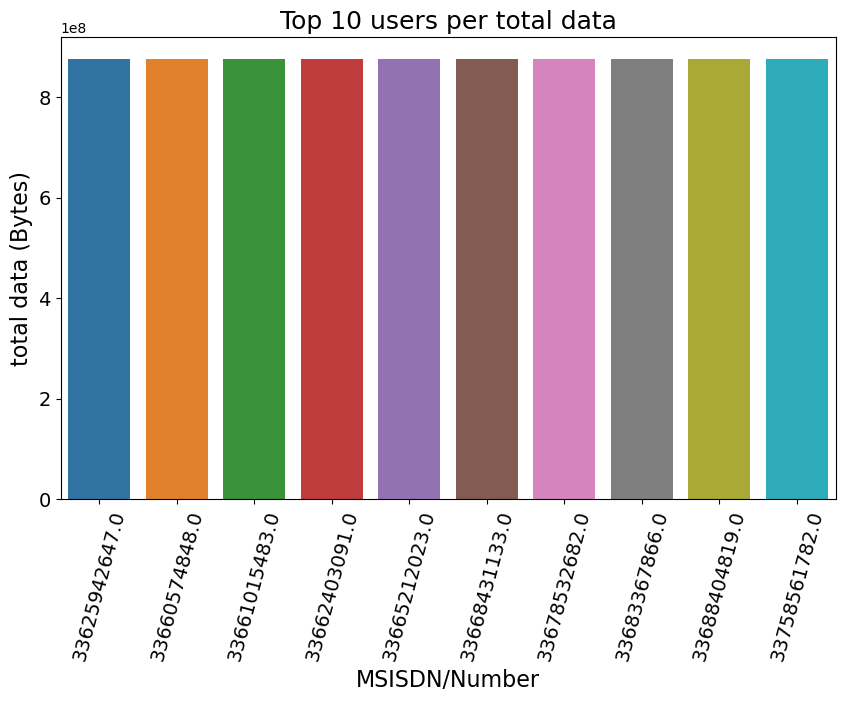

In [12]:
plot_top_users_per_metrics(users_data, 'MSISDN/Number',  'total data (Bytes)',"Top 10 users per total data", 10)

## Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

In [13]:
engagement_metrics=['Session Frequency', 'Dur. (ms)', 'total data (Bytes)']

In [14]:
normalized_metrics=normalizer(users_data, engagement_metrics)

In [16]:
clustering= kmeans(normalized_metrics, n_clusters=3)

### let save the centers coordinates in a data frame


In [53]:
engagement_centers=pd.DataFrame(clustering.cluster_centers_)
engagement_centers.columns=["x","y","z"]
engagement_centers.to_csv("../data/engagement_clusters_centers.csv")

In [54]:
users_data["engagement Group"]=clustering.labels_

### Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.


#### Minimum metrics for each cluster

In [55]:

grouped_stats_min = calculate_group_stats(users_data, 'engagement Group', engagement_metrics, 'min')
grouped_stats_min


,Session Frequency,Dur. (ms),total data (Bytes)
engagement Group,,,
0,1.470298,21519.0,31093346.0
1,1.000000,7146.0,28956107.0
2,1.000000,7142.0,455494221.0


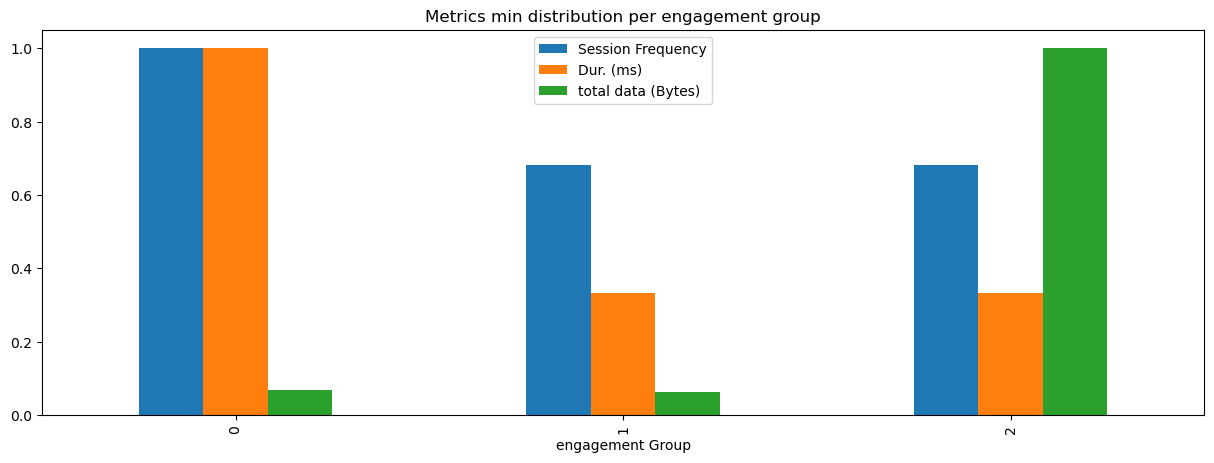

In [56]:
plot_group_stats(grouped_stats_min, "min")

#### maximum, metrics for each cluster

In [57]:
grouped_stats_max= calculate_group_stats(users_data, 'engagement Group', engagement_metrics, 'max')
grouped_stats_max

,Session Frequency,Dur. (ms),total data (Bytes)
engagement Group,,,
0,3.0,329224.0,875309321.0
1,2.0,287438.0,457607418.0
2,2.0,274744.0,875314847.0


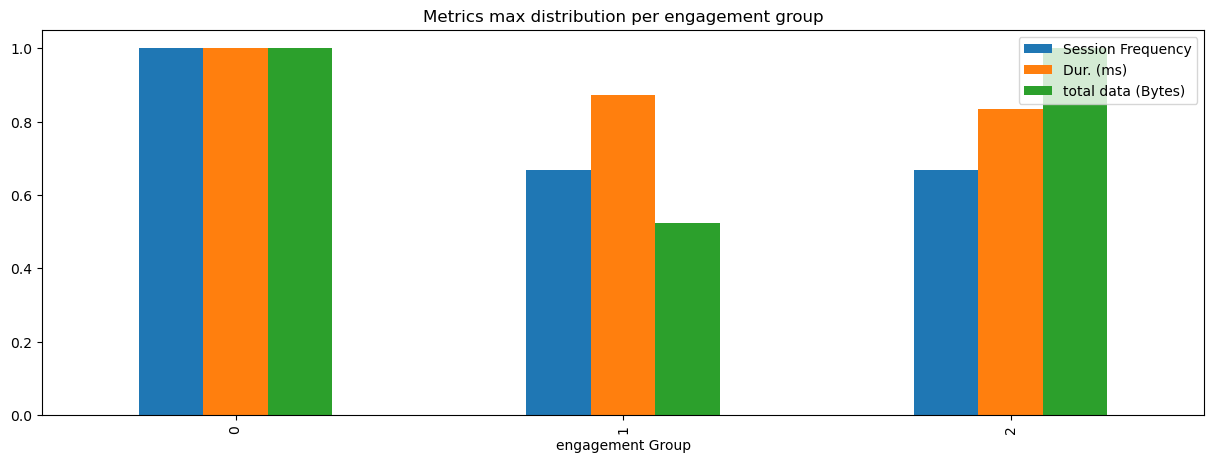

In [58]:
plot_group_stats(grouped_stats_max, "max")

#### Average metrics for each cluster

In [59]:
grouped_stats_mean = calculate_group_stats(users_data, 'engagement Group', engagement_metrics, 'mean')
grouped_stats_mean

,Session Frequency,Dur. (ms),total data (Bytes)
engagement Group,,,
0,2.171317,177199.982436,4.780669e+08
1,1.035896,95184.054822,2.614132e+08
2,1.028572,95892.346924,6.524677e+08


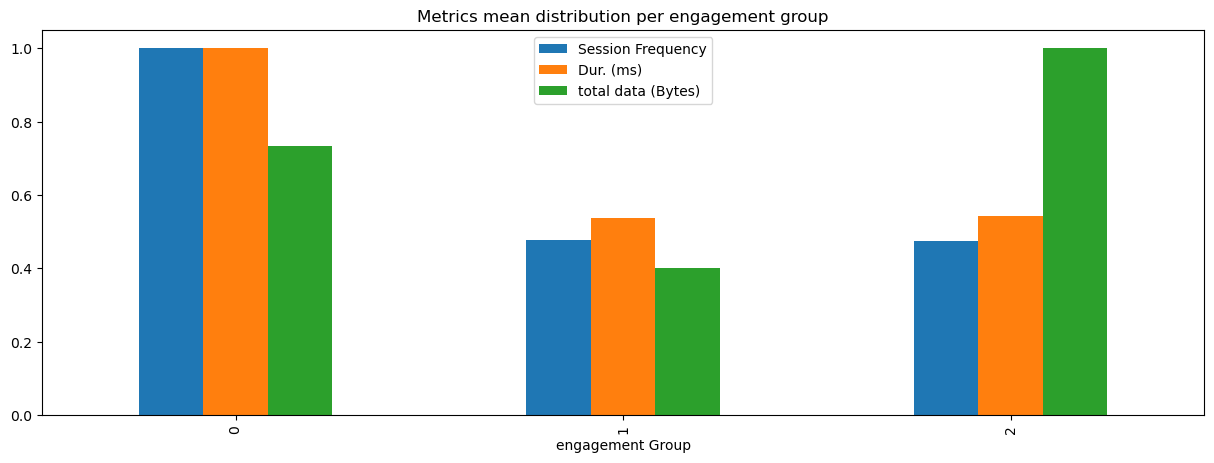

In [60]:
plot_group_stats(grouped_stats_mean, "mean")

#### total non-normalized metrics for each cluster


In [61]:
grouped_stats_total = calculate_group_stats(users_data, 'engagement Group', engagement_metrics, 'total')
grouped_stats_total

,Session Frequency,Dur. (ms),total data (Bytes)
engagement Group,,,
0,51362.500356,4.191666e+09,1.130867e+13
1,36393.090650,3.344006e+09,9.183969e+12
2,43423.204764,4.048287e+09,2.754523e+13


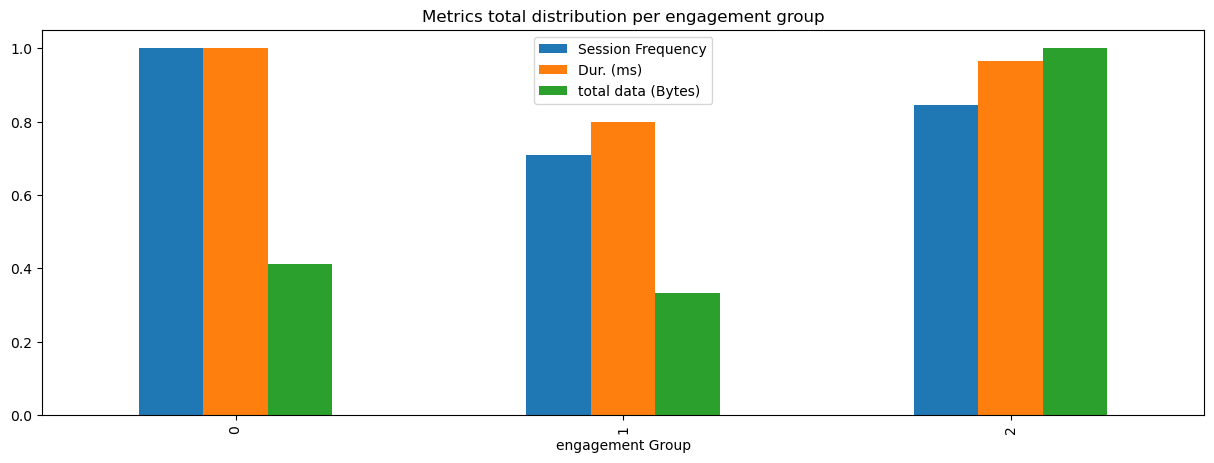

In [62]:
plot_group_stats(grouped_stats_total, "total")

# Interpretation

Group 1 is The worst in terms of engagement followed by Group 2. Individuals in Group 2 are the most engaged 

## Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [63]:
users_data.head()

,MSISDN/Number,Session Frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social_media_data,Google_data,Email_data,Youtube_data,Netflix_data,Gaming_data,Others_data,total data (Bytes),engagement Group,engagement Cluster
0,3.360100e+10,1.0,116720.0,4.546640e+08,36053108.0,2232135.0,4389005.0,1.331362e+06,21624548.0,27180981.0,4.234318e+08,386570872.0,3.456294e+08,1,2
1,3.360100e+10,1.0,181230.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3.307781e+06,12432223.0,11221763.0,1.197501e+08,281710071.0,7.071854e+08,2,1
2,3.360100e+10,1.0,134969.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3.205380e+06,21333570.0,19353900.0,5.388277e+08,501693672.0,3.076910e+08,1,2
3,3.360101e+10,1.0,49878.0,4.019932e+08,20327526.0,280294.0,9678493.0,2.284670e+06,6977321.0,1942092.0,3.911261e+08,35279702.0,4.957771e+08,2,1
4,3.360101e+10,2.0,37104.0,1.363130e+09,94280527.0,2912542.0,18499616.0,2.860947e+06,41533002.0,49201724.0,1.314798e+09,804804484.0,6.076814e+08,0,3


### Social media

In [64]:
top_users_per_metrics(users_data, 'MSISDN/Number', 'Social_media_data', 10)

,MSISDN/Number,Social_media_data
15010,3.362905e+10,5.784134e+06
61101,3.366590e+10,5.784004e+06
66232,3.366762e+10,5.783921e+06
58641,3.366514e+10,5.783491e+06
48026,3.366237e+10,5.783133e+06
97117,3.376226e+10,5.783090e+06
35424,3.365939e+10,5.783076e+06
98707,3.376310e+10,5.783069e+06
57832,3.366491e+10,5.782697e+06
93610,3.376101e+10,5.781958e+06


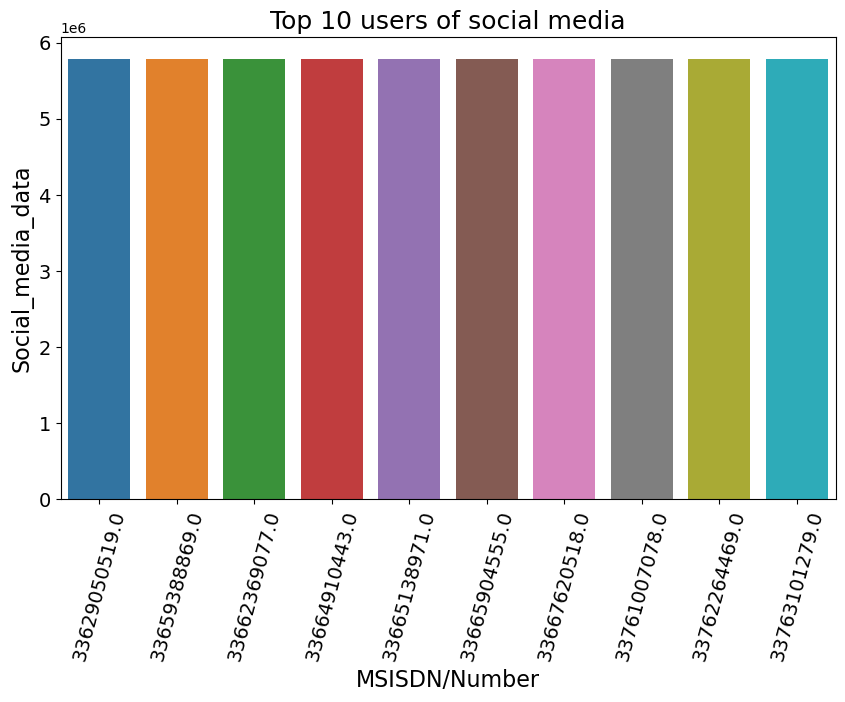

In [65]:
plot_top_users_per_metrics(users_data, 'MSISDN/Number', 'Social_media_data', "Top 10 users of social media", 10)

### Google

In [66]:
top_users_per_metrics(users_data, 'MSISDN/Number', 'Google_data', 10)

,MSISDN/Number,Google_data
34959,3.365929e+10,2.353870e+07
97931,3.376267e+10,2.353746e+07
69206,3.366856e+10,2.353720e+07
52411,3.366343e+10,2.353633e+07
94176,3.376122e+10,2.353414e+07
67245,3.366792e+10,2.353133e+07
92988,3.376075e+10,2.353088e+07
14171,3.362742e+10,2.352904e+07
69285,3.366858e+10,2.352868e+07
55415,3.366425e+10,2.352769e+07


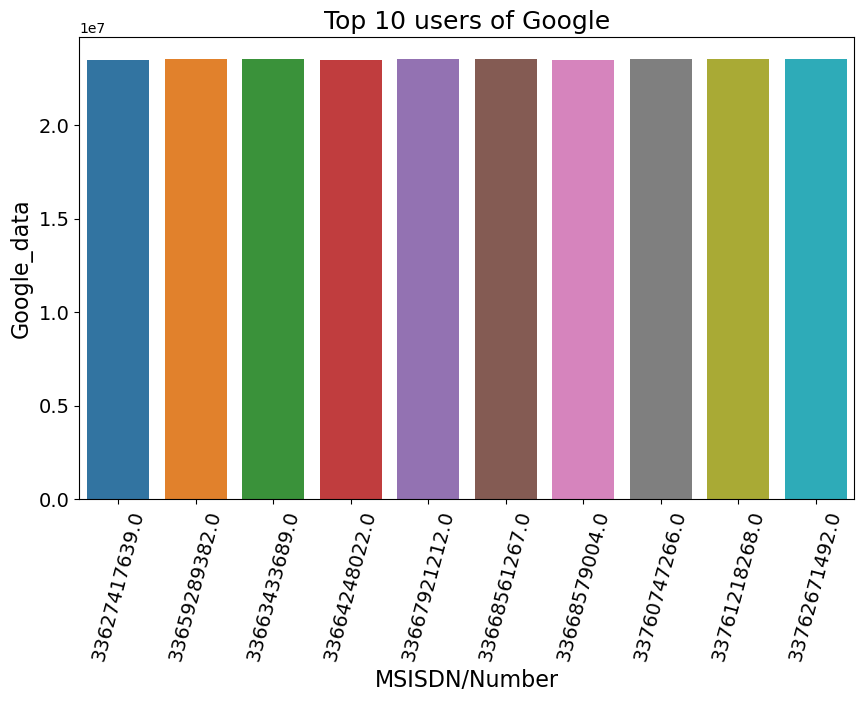

In [67]:
plot_top_users_per_metrics(users_data, 'MSISDN/Number', 'Google_data', "Top 10 users of Google", 10)

### Email

In [68]:
top_users_per_metrics(users_data, 'MSISDN/Number', 'Email_data', 10)

,MSISDN/Number,Email_data
82548,3.368896e+10,6.856907e+06
74943,3.367370e+10,6.856608e+06
60054,3.366551e+10,6.855963e+06
26361,3.365082e+10,6.855669e+06
52961,3.366359e+10,6.855571e+06
57312,3.366479e+10,6.855428e+06
281,3.360175e+10,6.855303e+06
78250,3.368027e+10,6.854754e+06
58404,3.366508e+10,6.852383e+06
18283,3.363642e+10,6.851934e+06


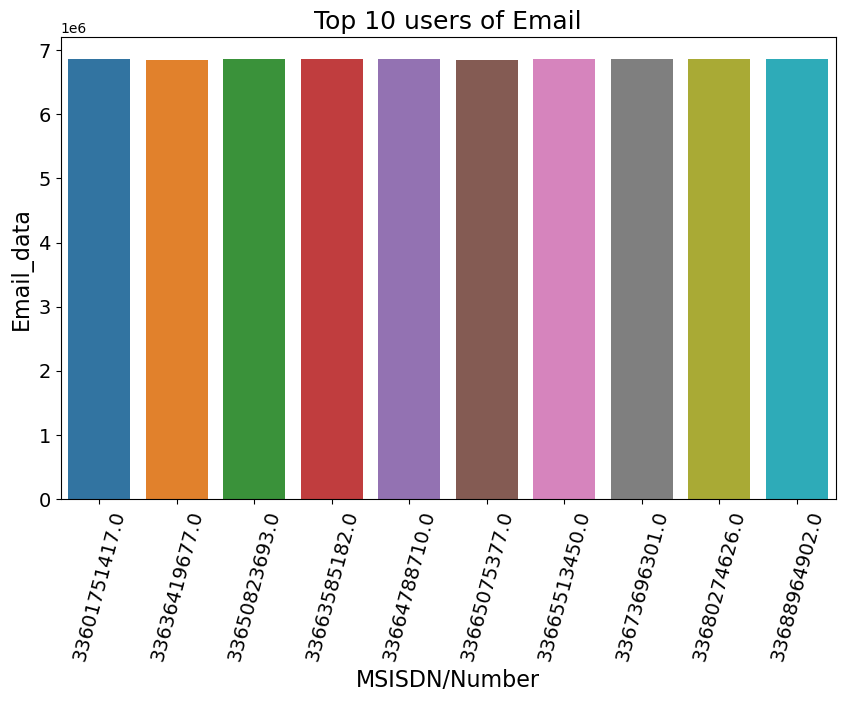

In [69]:
plot_top_users_per_metrics(users_data, 'MSISDN/Number', 'Email_data', "Top 10 users of Email", 10)

### Youtube	

In [70]:
top_users_per_metrics(users_data, 'MSISDN/Number', 'Youtube_data', 10)

,MSISDN/Number,Youtube_data
27144,3.365099e+10,6.755064e+07
56871,3.366467e+10,6.754858e+07
39280,3.366029e+10,6.754588e+07
40467,3.366057e+10,6.754372e+07
2975,3.360941e+10,6.753299e+07
99126,3.376341e+10,6.752900e+07
66203,3.366761e+10,6.752324e+07
65984,3.366753e+10,6.751506e+07
45646,3.366183e+10,6.751494e+07
68683,3.366840e+10,6.751317e+07


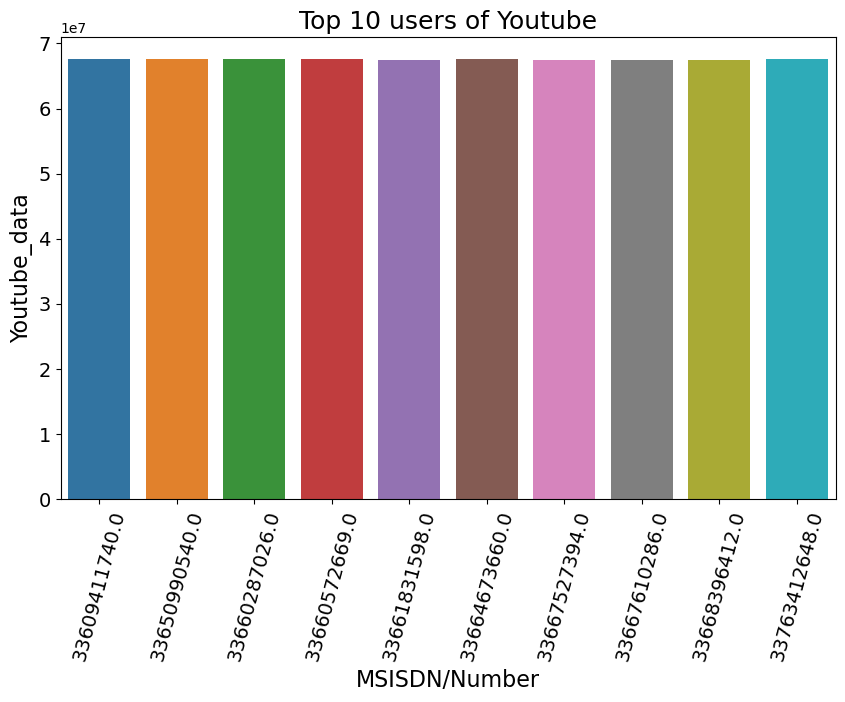

In [71]:
plot_top_users_per_metrics(users_data, 'MSISDN/Number', 'Youtube_data', "Top 10 users of Youtube", 10)

### Netflix	

In [72]:
top_users_per_metrics(users_data, 'MSISDN/Number', 'Netflix_data', 10)

,MSISDN/Number,Netflix_data
30246,3.365829e+10,6.764731e+07
56879,3.366468e+10,6.764254e+07
20954,3.364569e+10,6.764232e+07
23782,3.365022e+10,6.763393e+07
24520,3.365041e+10,6.762751e+07
94266,3.376125e+10,6.762635e+07
4343,3.361163e+10,6.760402e+07
68571,3.366836e+10,6.759825e+07
77533,3.367884e+10,6.758393e+07
64195,3.366694e+10,6.758130e+07


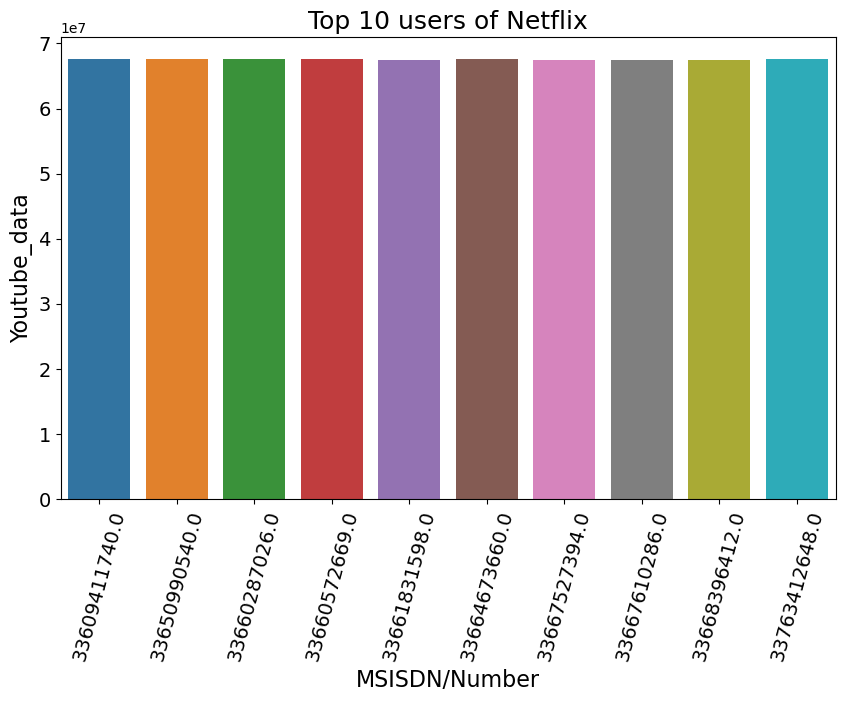

In [73]:
plot_top_users_per_metrics(users_data, 'MSISDN/Number', 'Youtube_data', "Top 10 users of Netflix", 10)

### Gaming

In [74]:
top_users_per_metrics(users_data, 'MSISDN/Number', 'Gaming_data', 10)

,MSISDN/Number,Gaming_data
36964,3.365974e+10,1.364497e+09
73246,3.367045e+10,1.364340e+09
52185,3.366338e+10,1.364304e+09
97402,3.376245e+10,1.364062e+09
100526,3.376573e+10,1.364061e+09
18746,3.363778e+10,1.364001e+09
96486,3.376200e+10,1.363999e+09
18695,3.363767e+10,1.363937e+09
85884,3.369872e+10,1.363895e+09
27816,3.365170e+10,1.363734e+09


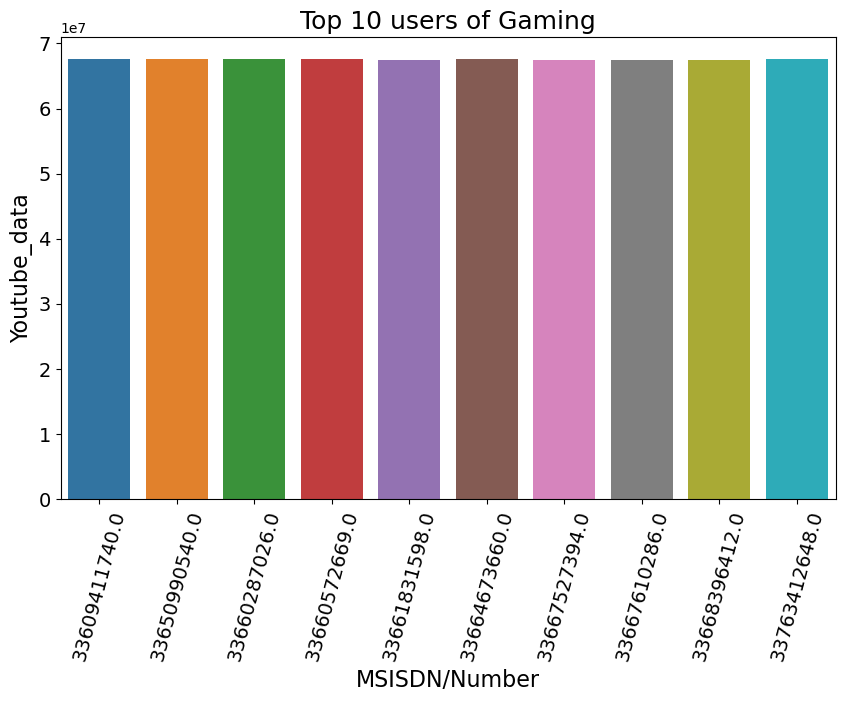

In [75]:
plot_top_users_per_metrics(users_data, 'MSISDN/Number', 'Youtube_data', "Top 10 users of Gaming", 10)

### Others

In [76]:
top_users_per_metrics(users_data, 'MSISDN/Number', 'Others_data', 10)

,MSISDN/Number,Others_data
94270,3.376125e+10,1.359745e+09
25443,3.365061e+10,1.359620e+09
79071,3.368188e+10,1.359608e+09
100134,3.376387e+10,1.359416e+09
19230,3.364032e+10,1.359350e+09
81951,3.368769e+10,1.359296e+09
27188,3.365100e+10,1.359149e+09
52411,3.366343e+10,1.359125e+09
62707,3.366643e+10,1.359119e+09
97402,3.376245e+10,1.358921e+09


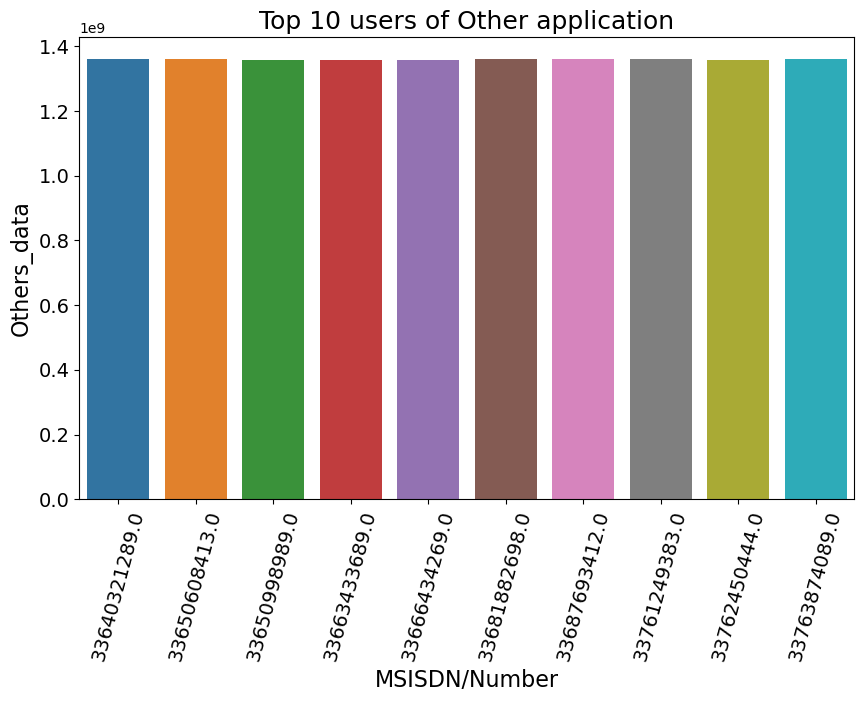

In [77]:
plot_top_users_per_metrics(users_data, 'MSISDN/Number', 'Others_data', "Top 10 users of Other application", 10)

## Plot the top 3 most used applications. 

In [78]:
applications= ['Social_media_data', 'Google_data', 'Email_data',
       'Youtube_data', 'Netflix_data', 'Gaming_data']

<Axes: title={'center': 'Top 3 most used applications'}, xlabel='Applications', ylabel='Total data'>

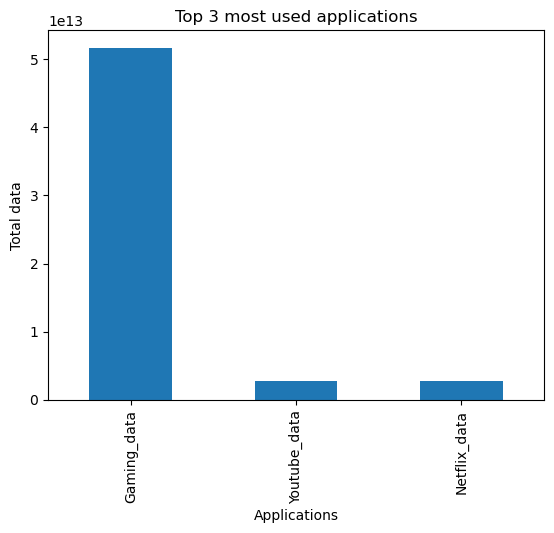

In [79]:
users_data[applications].sum().nlargest(3).plot(kind="bar",
        title="Top 3 most used applications", 
        xlabel="Applications", ylabel="Total data")

#### The top 3 applications used are Gaming, Youtube, Netflix

## Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 

- What is the optimized value of k (use elbow method for this)?  
- Interpret your findings. 


Text(0.5, 1.0, 'Elbow rule')

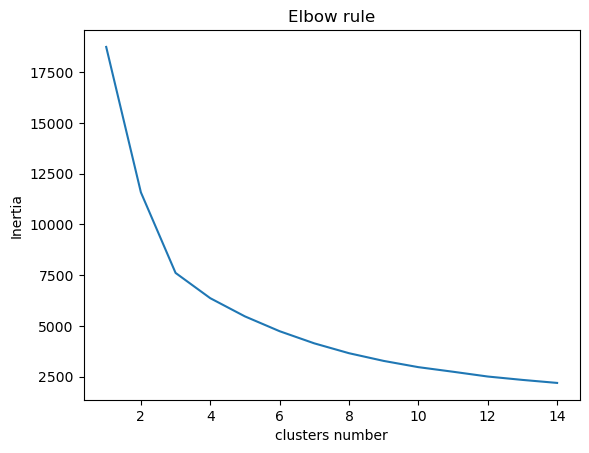

In [80]:
inertia_scores=[]
for i in range(1,15):
    inertia_scores.append(kmeans(normalized_metrics, n_clusters=i).inertia_)
plt.plot(range(1,15),inertia_scores)
plt.xlabel("clusters number")
plt.ylabel("Inertia")
plt.title("Elbow rule")

The optimal k is 4

In [81]:
kmeanOptimal= kmeans(normalized_metrics, n_clusters=4)
users_data["engagement Cluster"]=kmeanOptimal.labels_

In [82]:
kmeanOptimal.cluster_centers_

array([[0.58069561, 0.51651726, 0.2807391 ],
       [0.00859154, 0.27521939, 0.27772191],
       [0.00851691, 0.2770829 , 0.73462662],
       [0.58092388, 0.50561036, 0.73573635]])

In [83]:
users_data.head()

,MSISDN/Number,Session Frequency,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social_media_data,Google_data,Email_data,Youtube_data,Netflix_data,Gaming_data,Others_data,total data (Bytes),engagement Group,engagement Cluster
0,3.360100e+10,1.0,116720.0,4.546640e+08,36053108.0,2232135.0,4389005.0,1.331362e+06,21624548.0,27180981.0,4.234318e+08,386570872.0,3.456294e+08,1,1
1,3.360100e+10,1.0,181230.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3.307781e+06,12432223.0,11221763.0,1.197501e+08,281710071.0,7.071854e+08,2,2
2,3.360100e+10,1.0,134969.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3.205380e+06,21333570.0,19353900.0,5.388277e+08,501693672.0,3.076910e+08,1,1
3,3.360101e+10,1.0,49878.0,4.019932e+08,20327526.0,280294.0,9678493.0,2.284670e+06,6977321.0,1942092.0,3.911261e+08,35279702.0,4.957771e+08,2,2
4,3.360101e+10,2.0,37104.0,1.363130e+09,94280527.0,2912542.0,18499616.0,2.860947e+06,41533002.0,49201724.0,1.314798e+09,804804484.0,6.076814e+08,0,3


### Stats and plots

#### Minimum metrics for each cluster


In [84]:
grouped_stats_min1 = calculate_group_stats(users_data, 'engagement Cluster', engagement_metrics, 'min')
grouped_stats_min1

,Session Frequency,Dur. (ms),total data (Bytes)
engagement Cluster,,,
0,1.470298,21629.0,31093346.0
1,1.000000,7146.0,28956107.0
2,1.000000,7142.0,456255732.0
3,1.470298,18235.0,449956807.0


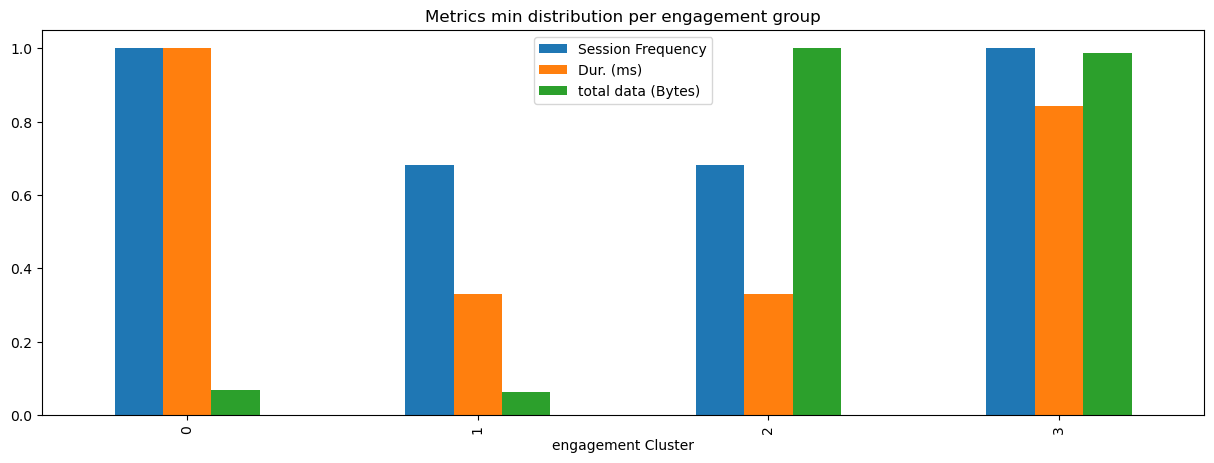

In [85]:
plot_group_stats(grouped_stats_min1, "min")

#### maximum metrics for each cluster


In [86]:
grouped_stats_max1= calculate_group_stats(users_data, 'engagement Cluster', engagement_metrics, 'max')
grouped_stats_max1

,Session Frequency,Dur. (ms),total data (Bytes)
engagement Cluster,,,
0,3.000000,329224.0,467463899.0
1,1.470298,241966.0,458109181.0
2,1.470298,241989.0,875314847.0
3,3.000000,329208.0,875309321.0


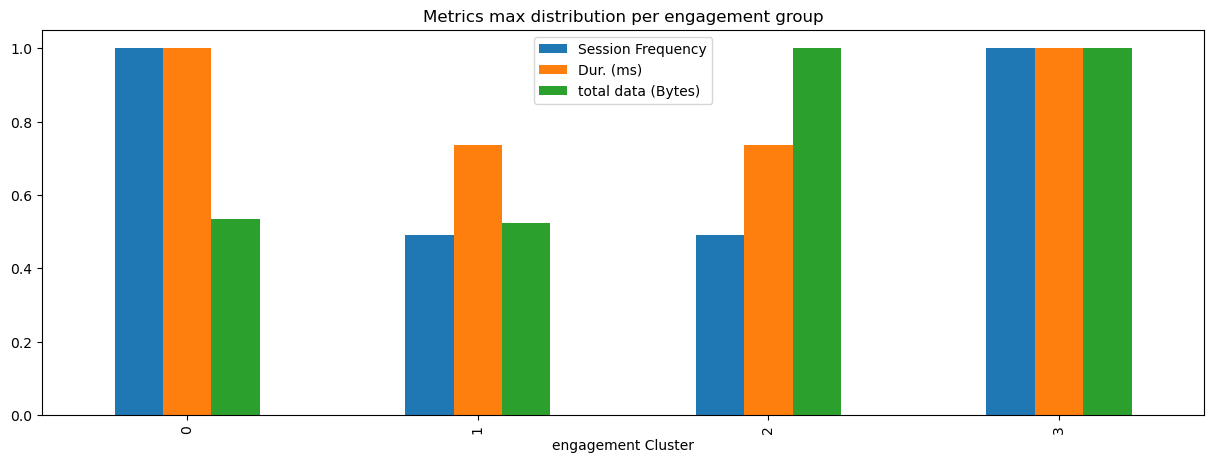

In [87]:
plot_group_stats(grouped_stats_max1, "max")

#### Average metrics for each cluster

In [88]:
grouped_stats_mean1 = calculate_group_stats(users_data, 'engagement Cluster', engagement_metrics, 'mean')
grouped_stats_mean1

,Session Frequency,Dur. (ms),total data (Bytes)
engagement Cluster,,,
0,2.161034,173409.300130,2.662866e+08
1,1.017170,95782.772489,2.640075e+08
2,1.017034,96385.416192,6.507138e+08
3,2.162096,170073.224086,6.514306e+08


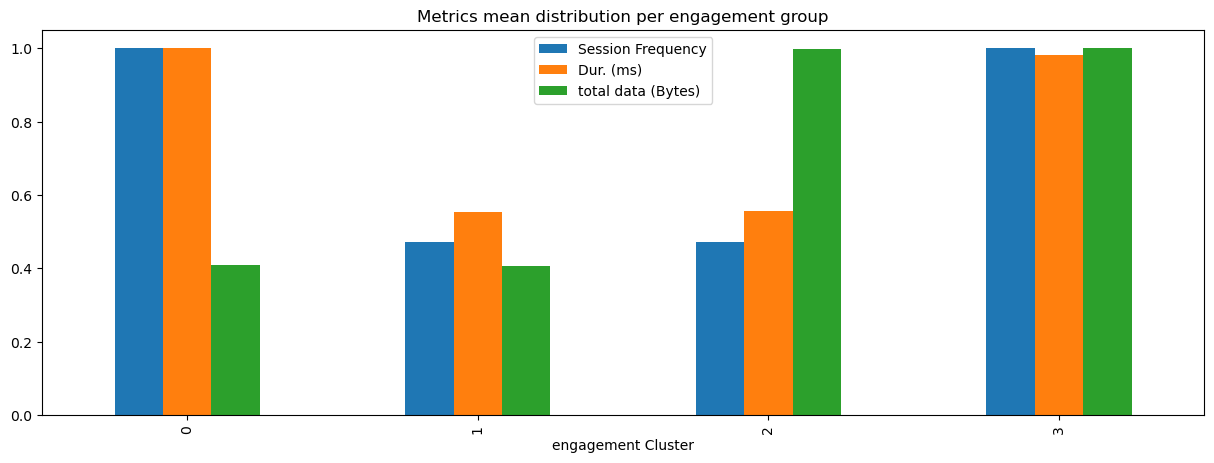

In [89]:
plot_group_stats(grouped_stats_mean1, "mean")

#### total non-normalized metrics for each cluster


In [90]:
grouped_stats_total1 = calculate_group_stats(users_data, 'engagement Cluster', engagement_metrics, 'total')
grouped_stats_total1


,Session Frequency,Dur. (ms),total data (Bytes)
engagement Cluster,,,
0,24514.772484,1.967155e+09,3.020755e+12
1,35077.105441,3.303069e+09,9.104298e+12
2,42372.679993,4.015706e+09,2.711069e+13
3,29214.237852,2.298029e+09,8.802131e+12


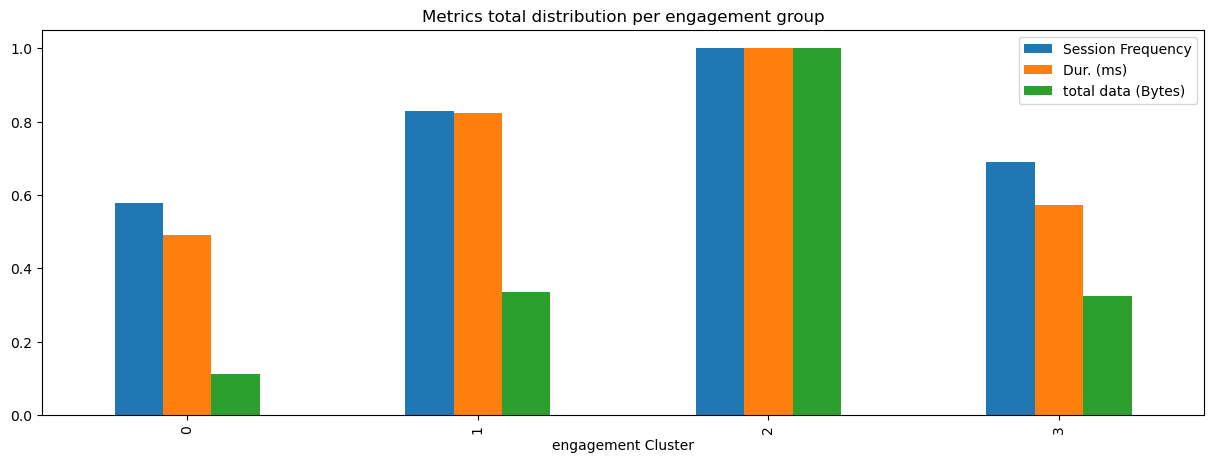

In [91]:
plot_group_stats(grouped_stats_total1, "total")

# Interpretation

Overall Individuals in group 1 seem to be less engaged followed by Group2 and then Group 0. Those in Group 3 are the most engaged

###  Let save the final dataset

In [93]:
users_data.to_csv("../data/users_engagement.csv")